# Капитализация Российского рынка ценных бумаг

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
plt.style.use('seaborn-white')

In [3]:
df = pd.read_csv('market_cap.csv', sep=';', decimal=',', index_col=0)
df.head()

,name,category,id,volume,price,cap,volume_2012_1,price_2012_1,cap_2012_1,volume_2012_2,...,cap_2020_1,volume_2020_2,price_2020_2,cap_2020_2,volume_2020_3,price_2020_3,cap_2020_3,volume_2020_4,price_2020_4,cap_2020_4
code,,,,,,,,,,,,,,,,,,,,,
ABBN,"АО ""Банк Астаны""",aо,KZ1C00001023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ABRD,"ПАО ""Абрау – Дюрсо""",aо,1-02-12500-A,NaN,NaN,NaN,NaN,NaN,NaN,7.350000e+05,...,1.308302e+10,9.800018e+07,130.000,1.274002e+10,9.800018e+07,194.000,1.901204e+10,9.800018e+07,200.500,1.964904e+10
ACKO,"ПАО ""АСКО-СТРАХОВАНИЕ""",aо,1-01-52065-Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.111840e+09,5.360000e+08,4.980,2.669280e+09,5.360000e+08,5.000,2.680000e+09,5.360000e+08,5.860,3.140960e+09
AESL,"ПАО ""ТПГ АЭССЕЛЬ""",aо,1-01-14863-A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AFKS,"ПАО АФК ""Система""",aо,1-05-01669-A,9.650000e+09,23.307,2.249126e+11,9.650000e+09,26.002,2.509193e+11,9.650000e+09,...,1.243788e+11,9.650000e+09,17.309,1.670318e+11,9.650000e+09,21.202,2.045993e+11,9.650000e+09,28.874,2.786341e+11


In [4]:
sums = []
for col in df.columns:
    if 'cap' in col:
        sums.append(df[col].sum())
sums = pd.Series(sums, name='cap_sum') / 1000000000000
gdp = pd.Series([60.1140008384141, 62.2719776967259, 64.2731509597493, 66.2433553285813, 68.1034496286394, 69.2906761278092, 70.3625623402524, 71.6502437155987, 72.9857011303393, 73.9270918692193,
                75.4633994757446, 77.0039343422155, 79.030040074734, 80.1865592437933, 80.8933848439715, 82.1379700718716, 83.087360054877, 83.504568333275, 84.2057879905226, 84.6523138088193,
                85.6160838014077, 87.3170817789372, 88.7824209071459, 90.2655218343233, 91.8431542184988, 94.1023024639666, 97.4103007045686, 101.201008499582, 104.629637732389, 106.729161649799,
                107.913832038787, 109.280326655954, 110.046051637012, 110.418926126872, 107.296867575758, 106.36278773436, 115.497488286389], name='gdp')

In [5]:
cap_data = pd.DataFrame([sums, gdp]).T.set_index(np.linspace(2011, 2020, len(sums)))
cap_data['gdp_%'] = cap_data['cap_sum'] / cap_data['gdp'] * 100

In [6]:
cap_data.tail()

,cap_sum,gdp,gdp_%
2019.00,48.639603,110.046052,44.199317
2019.25,39.644033,110.418926,35.903295
2019.50,43.671718,107.296868,40.701765
2019.75,45.053488,106.362788,42.358319
2020.00,51.427761,115.497488,44.527168


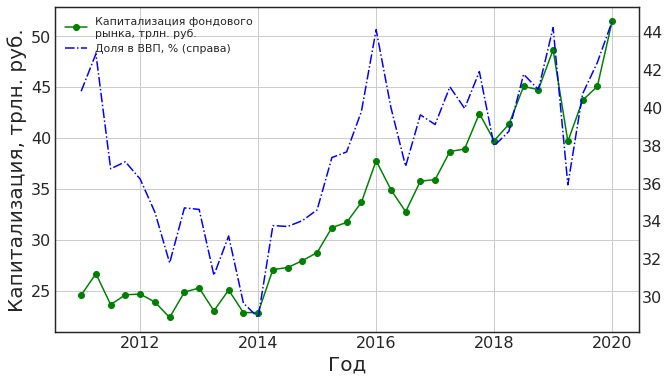

In [170]:
fig, ax = plt.subplots(figsize=(10, 6), tight_layout=True)

cap_data['cap_sum'].plot(label='Капитализация фондового\nрынка, трлн. руб.',
                         legend=True,
                         fontsize=16,
                         marker='o',
                         color='green',
                         ax=ax)
cap_data['gdp_%'].plot(secondary_y=True,
                       label='Доля в ВВП, % (справа)',
                       legend=True,
                       mark_right=False,
                       fontsize=16,
                       linestyle='dashdot',
                       color='blue',
                       ax=ax)

ax.set_xlabel('Год', fontsize=20)
ax.set_ylabel('Капитализация, трлн. руб.', fontsize=20)
ax.grid()

fig.savefig('market_cap.png', dpi=180)

  Капитализация внутреннего рынка акций по итогам 2020 года составила 51,4 трлн. руб. По сравнению с началом 2020 года она увеличилась на 14%. После падения в 2014 г. восстановление рынка заняло 2 года.

In [15]:
df_cap = pd.read_excel('list-archive-01122020.xlsx', sheet_name=0, header=0, engine='openpyxl')
df_cap[df_cap['Тип ценной бумаги'] == 'Акция обыкновенная'].groupby('Листинг')['ИНН'].count()

Листинг
Второй уровень          22
Первый уровень          42
Третий уровень         142
Третий уровень(РИИ)      5
Name: ИНН, dtype: int64

In [16]:
emitents = pd.DataFrame({'first': [46, 47, 53, 70, 76, 76, 60, 43, 39, 42, 41],
                         'second': [68, 64, 57, 41, 40, 36, 33, 29, 23, 22, 23],
                         'third': [289, 232, 228, 212, 203, 197, 203, 150, 149, 147, 146],
                         }, index=range(2011, 2022))
emitents

,first,second,third
2011,46,68,289
2012,47,64,232
2013,53,57,228
2014,70,41,212
2015,76,40,203
2016,76,36,197
2017,60,33,203
2018,43,29,150
2019,39,23,149
2020,42,22,147


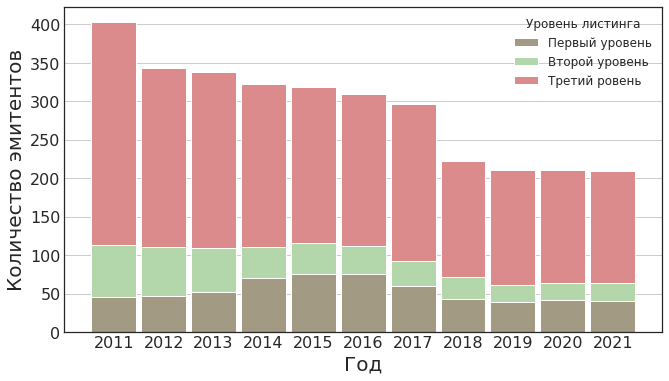

In [171]:
fig, ax = plt.subplots(figsize=(10, 6), tight_layout=True)

plt.bar(emitents.index, emitents['first'], color='#a39a84', label='Первый уровень', width=0.9)
plt.bar(emitents.index, emitents['second'], bottom=emitents['first'], color='#b3d6aa', label='Второй уровень', width=0.9)
plt.bar(emitents.index, emitents['third'], bottom=emitents['second']+emitents['first'], color='#db8b8b', label='Третий ровень', width=0.9)

ax.set_xticks(emitents.index)
ax.legend(title='Уровень листинга', fontsize=12)
ax.set_xlabel('Год', fontsize=20)
ax.set_ylabel('Количество эмитентов', fontsize=20)
ax.grid(axis='y')
plt.tick_params(axis='both', which='major', labelsize=16)

fig.savefig('corps_number.png', dpi=180)

  Количество эмитентов акций, торгуемых на Московской бирже, за последние 10 лет уменьшилось почти в 2 раза.

In [137]:
main_cap_weigths = []
counter = 0
for col in df.columns:
    if 'cap' in col:
        weight = df[col].sort_values(ascending=False).head(10).sum() / (sums.values[counter] * 1000000000000) * 100
        main_cap_weigths.append(weight)
        counter += 1

In [179]:
main_cap_weigths[-1]

64.43467839765901

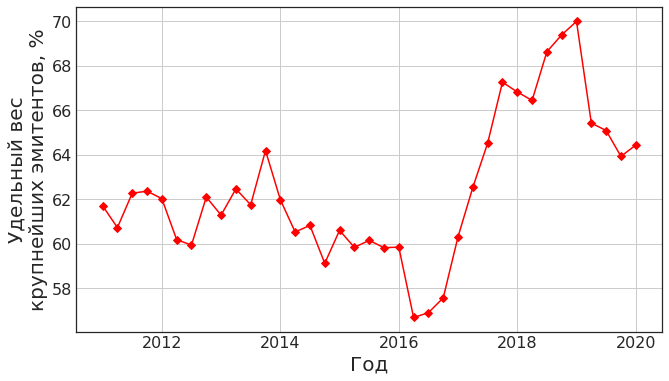

In [177]:
fig, ax = plt.subplots(figsize=(10, 6), tight_layout=True)

plt.plot(cap_data.index, main_cap_weigths, '-D', color='red')
plt.tick_params(axis='both', which='major', labelsize=16)
ax.grid()
plt.xlabel('Год', fontsize=20)
plt.ylabel('Удельный вес\nкрупнейших эмитентов, %', fontsize=20)

fig.savefig('big_weight.png', dpi=180)

  Доля 10 крупнейших компаний в капитализации в 2020 году составила 64,4%.